In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)
plt.rc("figure", figsize=(16, 8))

> A loan is initially endorsed when all parties have agreed upon the design, costs & mortgage assumptions and any construction is ready to begin.

Source: https://www.hud.gov/program_offices/housing/mfh/mfdata/miebyfy

In [3]:
initial_endorsements = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Initial Endorsements", header=6)
print(initial_endorsements.shape)
initial_endorsements.head()

(19248, 28)


,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Lender at Initial Endorsement,Mortgage at time of Initial Endorsement,Unit or Bed Count,Date of Initial Endorsement,Fiscal Year of Initial Endorsement,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Endorsement Lender,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Firm Commitment Lender
0,6698027,Malibu Bay,W. Palm Beach,FL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,FLORIDA HFA,20010000,264,2005-10-01,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,FLORIDA HFA,20500000,2003-07-03,FLORIDA HFA
1,1722029,Talmadge Park Healthcare,Eats Haven,CT,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,"CAPMARK FINANCE, INC",5984000,90,2005-10-03,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,"CAPMARK FINANCE, INC",5984000,2005-09-23,"CAPMARK FINANCE, INC"
2,12235684,East 35th Street Apartments,Palmdale,CA,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,ACTIVE MORTGAGE CORP,1549600,48,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,ACTIVE MORTGAGE CORP,1549600,2005-09-13,ACTIVE MORTGAGE CORP
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,FEDERAL NATIONAL MORTGAGE,4000000,2005-10-03,FEDERAL NATIONAL MORTGAGE
4,12397260,Somerset Village Apts.,Kingman,AZ,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,FEDERAL NATIONAL MORTGAGE,1557000,72,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,FEDERAL NATIONAL MORTGAGE,1557000,2005-05-05,ORIX REAL ESTATE CAPITAL LLC


In [4]:
initial_endorsements.tail()

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Lender at Initial Endorsement,Mortgage at time of Initial Endorsement,Unit or Bed Count,Date of Initial Endorsement,Fiscal Year of Initial Endorsement,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Endorsement Lender,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Firm Commitment Lender
19243,12111255,Alderwood Apartments,Lemoore,CA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,ORIX REAL ESTATE CAPITAL LLC,5815600,80,2020-03-31,2020,MAP,0,0,0,0,0,0,0,Finally Endorsed,ORIX REAL ESTATE CAPITAL LLC,5495600,2019-12-17,ORIX REAL ESTATE CAPITAL LLC
19244,12111256,Maplewood Apartments,Fresno,CA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,ORIX REAL ESTATE CAPITAL LLC,8375200,100,2020-03-31,2020,MAP,0,0,0,0,0,0,0,Finally Endorsed,ORIX REAL ESTATE CAPITAL LLC,7914300,2019-12-17,ORIX REAL ESTATE CAPITAL LLC
19245,12211434,Pineview Apartments,Bakersfield,CA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,ORIX REAL ESTATE CAPITAL LLC,7691100,110,2020-03-31,2020,MAP,0,0,0,0,0,0,0,Finally Endorsed,ORIX REAL ESTATE CAPITAL LLC,7267900,2019-12-17,ORIX REAL ESTATE CAPITAL LLC
19246,12211435,The Meadows Apartments,Bakersfield,CA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,ORIX REAL ESTATE CAPITAL LLC,9603900,134,2020-03-31,2020,MAP,0,0,0,0,0,0,0,Finally Endorsed,ORIX REAL ESTATE CAPITAL LLC,9112600,2019-12-20,ORIX REAL ESTATE CAPITAL LLC
19247,5235839,Enclave at Box Hill,Abingdon,MD,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,DWIGHT CAPITAL LLC,39999000,240,2020-03-31,2020,MAP,0,0,0,0,0,0,0,Finally Endorsed,DWIGHT CAPITAL LLC,39999000,2020-02-03,DWIGHT CAPITAL LLC


In [5]:
commitments  = pd.read_excel("Initi_Endores_Firm Comm_DB_FY06_FY20_Q2.xlsx", sheet_name="Firm Cmtmts, Iss'd and Reiss'd", header=6)
print(commitments.shape)
commitments.head()

(20918, 29)


,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
0,11345004,Western Heights Apartments,Olney,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,277600,48,2005-10-01,2006,277600,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Firm Comit then Owner Withdrew,271700
1,11345005,Woodlands Village Apts,Breckenridge,TX,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/236,Firm Issued,GREYSTONE SERVICING COMPANY LLC,173000,88,2005-10-01,2006,173000,2005-10-01,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,168300
2,4235583,Harbor Court Apartments,Rocky River,OH,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,GREYSTONE SERVICING COMPANY LLC,3886800,120,2005-10-03,2006,3886800,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,3886800
3,3297260,Compton Towne Apartments,Wilmington,DE,Risk Sharing,QPE Risk Sharing,Refinance,Refi/ Pchse,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Existing,Firm Issued,FEDERAL NATIONAL MORTGAGE,4000000,76,2005-10-03,2006,4000000,2005-10-03,2006,TAP,Y,0,0,0,0,0,0,Finally Endorsed,4000000
4,7135779,Evergreen Terrace I,Joliet,IL,Basic FHA,223a7 Refi Apts,Refinance,Refi/ Pchse,Apts,a7/221d4,Firm Issued,REILLY MORTGAGE GRP,5129000,241,2005-10-04,2006,5129000,2005-10-04,2006,TAP,0,0,0,0,0,0,0,Firm Expired,5247700


In [6]:
commitments.tail()

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Firm Commitment Activity,Lender at Firm Commitment Activity,"Mortgage at time of Firm Commitment Issuance, Amendment or Reissuance",Unit or Bed Count,Date of Firm Commitment Activity,Fiscal Year of Firm Commitment Activity,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Fiscal Year of Firm Commitment,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Mortgage Amount
20913,12711269,Quail Run Apartments,Vancouver,WA,Basic FHA,223f Refi/Purchase Apts,Refinance,Refi/ Pchse,Apts/Coops,223f Apts,Firm Issued,SUNTRUST BANK,17051600,129,2020-03-31,2020,17051600,2020-03-31,2020,MAP,Y,0,0,0,0,0,0,Firm Issued,17051600
20914,2210003,Legacy Memory Care,Falmouth,ME,Basic FHA,232 Health Care,Additions,Impv/Adds,Asst'd Livg,ALF 241a,Firm Issued,PRUDENTIAL HUNTOON PAIGE,1189200,30,2020-03-31,2020,1189200,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,1189200
20915,6722256,Consulate Health Care of Kissimmee,Kissimmee,FL,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,Firm Issued,ORIX REAL ESTATE CAPITAL LLC,17920000,120,2020-03-31,2020,17920000,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,17920000
20916,11322284,The Villages of Lake Highlands,Dallas,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,Firm Issued,ORIX REAL ESTATE CAPITAL LLC,20756500,154,2020-03-31,2020,20756500,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,20756500
20917,11422098,LB Belon - Bradford at Brookside,Livingston,TX,Basic FHA,232 Health Care,Refinance,Refi/ Pchse,Nursing/ICF,Nursing/ ICF 223f,Firm Issued,BERKADIA COMMERCIAL MTG,6820100,125,2020-03-31,2020,6820100,2020-03-31,2020,TAP,0,0,0,0,0,0,0,Firm Issued,6820100


In [7]:
endorsements = initial_endorsements

In [8]:
endorsements["Activity Description"].value_counts()

Refinance           14991
New Construction     2172
SubRehab             1268
Purchase              571
Additions             128
Improvements          105
Operating Loss         13
Name: Activity Description, dtype: int64

In [9]:
new_construction = endorsements[endorsements["Activity Description"] == "New Construction"]
new_construction

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Lender at Initial Endorsement,Mortgage at time of Initial Endorsement,Unit or Bed Count,Date of Initial Endorsement,Fiscal Year of Initial Endorsement,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Endorsement Lender,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Firm Commitment Lender
0,6698027,Malibu Bay,W. Palm Beach,FL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,FLORIDA HFA,20010000,264,2005-10-01,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,FLORIDA HFA,20500000,2003-07-03,FLORIDA HFA
4,12397260,Somerset Village Apts.,Kingman,AZ,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,FEDERAL NATIONAL MORTGAGE,1557000,72,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,FEDERAL NATIONAL MORTGAGE,1557000,2005-05-05,ORIX REAL ESTATE CAPITAL LLC
14,7198030,Liberty Arms Senior Apartments,Wauconda,IL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,ILLINOIS HDA,6345000,119,2005-10-07,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,ILLINOIS HDA,6000000,2005-07-21,ILLINOIS HDA
46,5335848,The Commons at Widewaters Apts.,Knightdale,NC,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,"CAPMARK FINANCE, INC",30433200,332,2005-10-20,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,"CAPMARK FINANCE, INC",30433200,2005-07-15,"CAPMARK FINANCE, INC"
47,6235602,Chapel Creek Apartments,Fultondale,AL,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,CAPMARK BANK,17547100,248,2005-10-20,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,CAPMARK BANK,17158500,2005-05-19,"CAPMARK FINANCE, INC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19181,9298159,Apex Townhomes,Detroiit Lakes,MN,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg FFB NC/SR,MINNESOTA HFA,1389000,30,2020-03-23,2020,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,MINNESOTA HFA,1389000,2018-09-10,MINNESOTA HFA
19187,11635185,South Meadows Apartments,Santa Fe,NM,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,CBRE HMF INC,49732800,240,2020-03-24,2020,MAP,0,0,0,0,0,0,0,Initially Endorsed,0,50619700,2019-09-18,CBRE HMF INC
19202,6543132,Cooperwood Senior Living,Flowood,MS,Basic FHA,232 Health Care,New Construction,NC/SR,Asst'd Livg,ALF NC/SR,CENTENNIAL MORTGAGE,18982500,94,2020-03-25,2020,TAP,0,0,0,0,0,0,0,Initially Endorsed,0,18982500,2019-11-05,CENTENNIAL MORTGAGE
19218,11435789,Encore Grand Crossing,Katy,TX,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,BERKADIA COMMERCIAL MTG,36617000,240,2020-03-30,2020,MAP,0,0,0,0,0,0,0,Initially Endorsed,0,34645000,2019-11-27,BERKADIA COMMERCIAL MTG


In [10]:
nc_sr = endorsements[endorsements["Activity Group"] == "NC/SR"]
nc_sr

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Lender at Initial Endorsement,Mortgage at time of Initial Endorsement,Unit or Bed Count,Date of Initial Endorsement,Fiscal Year of Initial Endorsement,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Endorsement Lender,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Firm Commitment Lender
0,6698027,Malibu Bay,W. Palm Beach,FL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,FLORIDA HFA,20010000,264,2005-10-01,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,FLORIDA HFA,20500000,2003-07-03,FLORIDA HFA
4,12397260,Somerset Village Apts.,Kingman,AZ,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,FEDERAL NATIONAL MORTGAGE,1557000,72,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,FEDERAL NATIONAL MORTGAGE,1557000,2005-05-05,ORIX REAL ESTATE CAPITAL LLC
9,12335411,Phoenix Memorial Towers,Phoenix,AZ,Basic FHA,FHA NC/SR Apts,SubRehab,NC/SR,Apts,221d4,CAPSTONE REALTY ADVISORS,4100000,153,2005-10-05,2006,MAP,Y,0,0,0,Y,0,0,Finally Endorsed,CAPSTONE REALTY ADVISORS,4100000,2005-03-07,PARAGON MORTGAGE
14,7198030,Liberty Arms Senior Apartments,Wauconda,IL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,ILLINOIS HDA,6345000,119,2005-10-07,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,ILLINOIS HDA,6000000,2005-07-21,ILLINOIS HDA
46,5335848,The Commons at Widewaters Apts.,Knightdale,NC,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,"CAPMARK FINANCE, INC",30433200,332,2005-10-20,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,"CAPMARK FINANCE, INC",30433200,2005-07-15,"CAPMARK FINANCE, INC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19181,9298159,Apex Townhomes,Detroiit Lakes,MN,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg FFB NC/SR,MINNESOTA HFA,1389000,30,2020-03-23,2020,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,MINNESOTA HFA,1389000,2018-09-10,MINNESOTA HFA
19187,11635185,South Meadows Apartments,Santa Fe,NM,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,CBRE HMF INC,49732800,240,2020-03-24,2020,MAP,0,0,0,0,0,0,0,Initially Endorsed,0,50619700,2019-09-18,CBRE HMF INC
19202,6543132,Cooperwood Senior Living,Flowood,MS,Basic FHA,232 Health Care,New Construction,NC/SR,Asst'd Livg,ALF NC/SR,CENTENNIAL MORTGAGE,18982500,94,2020-03-25,2020,TAP,0,0,0,0,0,0,0,Initially Endorsed,0,18982500,2019-11-05,CENTENNIAL MORTGAGE
19218,11435789,Encore Grand Crossing,Katy,TX,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,BERKADIA COMMERCIAL MTG,36617000,240,2020-03-30,2020,MAP,0,0,0,0,0,0,0,Initially Endorsed,0,34645000,2019-11-27,BERKADIA COMMERCIAL MTG


In [11]:
nc_sr.rename(columns={"FHA Number": "fha_number"}, inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [12]:
nc_sr.head()

,fha_number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Lender at Initial Endorsement,Mortgage at time of Initial Endorsement,Unit or Bed Count,Date of Initial Endorsement,Fiscal Year of Initial Endorsement,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Endorsement Lender,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Firm Commitment Lender
0,6698027,Malibu Bay,W. Palm Beach,FL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,FLORIDA HFA,20010000,264,2005-10-01,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,FLORIDA HFA,20500000,2003-07-03,FLORIDA HFA
4,12397260,Somerset Village Apts.,Kingman,AZ,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,FEDERAL NATIONAL MORTGAGE,1557000,72,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,FEDERAL NATIONAL MORTGAGE,1557000,2005-05-05,ORIX REAL ESTATE CAPITAL LLC
9,12335411,Phoenix Memorial Towers,Phoenix,AZ,Basic FHA,FHA NC/SR Apts,SubRehab,NC/SR,Apts,221d4,CAPSTONE REALTY ADVISORS,4100000,153,2005-10-05,2006,MAP,Y,0,0,0,Y,0,0,Finally Endorsed,CAPSTONE REALTY ADVISORS,4100000,2005-03-07,PARAGON MORTGAGE
14,7198030,Liberty Arms Senior Apartments,Wauconda,IL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,ILLINOIS HDA,6345000,119,2005-10-07,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,ILLINOIS HDA,6000000,2005-07-21,ILLINOIS HDA
46,5335848,The Commons at Widewaters Apts.,Knightdale,NC,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,"CAPMARK FINANCE, INC",30433200,332,2005-10-20,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,"CAPMARK FINANCE, INC",30433200,2005-07-15,"CAPMARK FINANCE, INC"


In [13]:
nc_sr.groupby(["Project State", "Project City"]).fha_number.count().sort_values(ascending=False)

Project State  Project City 
IL             Chicago          51
MD             Baltimore        49
TX             San Antonio      47
MN             Minneapolis      36
GA             Atlanta          31
                                ..
MI             Harper Woods      1
               HOWELL            1
               HIGHLAND PARK     1
TX             Cedar Hill        1
AL             Anniston          1
Name: fha_number, Length: 1593, dtype: int64

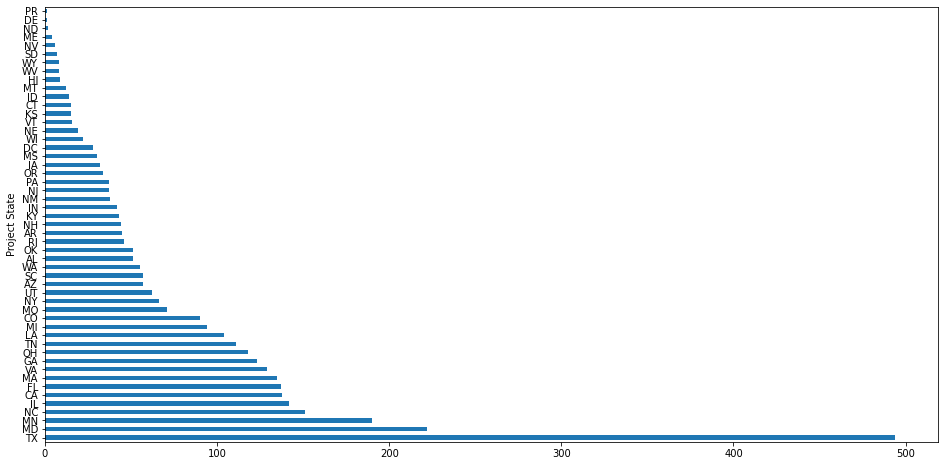

In [14]:
nc_sr.groupby(["Project State"]).fha_number.count().sort_values(ascending=False).plot.barh()
plt.show()

In [15]:
endorsements["Activity Description"].value_counts().index.to_list()

['Refinance',
 'New Construction',
 'SubRehab',
 'Purchase',
 'Additions',
 'Improvements',
 'Operating Loss']

In [16]:
commitments["Activity Description"].value_counts().index.to_list()

['Refinance',
 'New Construction',
 'SubRehab',
 'Purchase',
 'Additions',
 'Improvements',
 'Operating Loss']

In [17]:
endorsements["Activity Group"].value_counts().index.to_list()

['Refi/ Pchse', 'NC/SR', 'Impv/Adds', 'Operatg Loss']

In [18]:
endorsements["Basic FHA, Risk Share or Other"].value_counts().index.to_list()

['Basic FHA', 'Risk Sharing', 'Hospitals & Group Practice']

In [19]:
commitments["Basic FHA, Risk Share or Other"].value_counts().index.to_list()

['Basic FHA', 'Risk Sharing', 'Hospitals & Group Practice']

In [20]:
endorsements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19248 entries, 0 to 19247
Data columns (total 28 columns):
FHA Number                                 19248 non-null int64
Project Name                               19248 non-null object
Project City                               19248 non-null object
Project State                              19248 non-null object
Basic FHA, Risk Share or Other             19248 non-null object
Program Category                           19248 non-null object
Activity Description                       19248 non-null object
Activity Group                             19248 non-null object
Facility Type                              19248 non-null object
Program Designation                        19248 non-null object
Lender at Initial Endorsement              19248 non-null object
Mortgage at time of Initial Endorsement    19248 non-null int64
Unit or Bed Count                          19248 non-null int64
Date of Initial Endorsement                19248 

In [21]:
endorsements[endorsements["Activity Description"] == "New Construction"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 19242
Data columns (total 28 columns):
FHA Number                                 2172 non-null int64
Project Name                               2172 non-null object
Project City                               2172 non-null object
Project State                              2172 non-null object
Basic FHA, Risk Share or Other             2172 non-null object
Program Category                           2172 non-null object
Activity Description                       2172 non-null object
Activity Group                             2172 non-null object
Facility Type                              2172 non-null object
Program Designation                        2172 non-null object
Lender at Initial Endorsement              2172 non-null object
Mortgage at time of Initial Endorsement    2172 non-null int64
Unit or Bed Count                          2172 non-null int64
Date of Initial Endorsement                2172 non-null dateti

In [22]:
nc = new_construction

In [23]:
nc

,FHA Number,Project Name,Project City,Project State,"Basic FHA, Risk Share or Other",Program Category,Activity Description,Activity Group,Facility Type,Program Designation,Lender at Initial Endorsement,Mortgage at time of Initial Endorsement,Unit or Bed Count,Date of Initial Endorsement,Fiscal Year of Initial Endorsement,MAP or TAP,LIHTC Designation,Tax Exempt Bond Designation,HOME Designation,CDBG Designation,Section 202 Refi Designation,IRP Decoupling Designation,HOPE VI Designation,Current Status,Final Endorsement Lender,Mortgage at Firm Commitment Issuance,Date of Firm Issue,Firm Commitment Lender
0,6698027,Malibu Bay,W. Palm Beach,FL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,FLORIDA HFA,20010000,264,2005-10-01,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,FLORIDA HFA,20500000,2003-07-03,FLORIDA HFA
4,12397260,Somerset Village Apts.,Kingman,AZ,Risk Sharing,QPE Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,QPE Risk Shg Rec Comp,FEDERAL NATIONAL MORTGAGE,1557000,72,2005-10-03,2006,TAP,0,0,0,0,0,0,0,Finally Endorsed,FEDERAL NATIONAL MORTGAGE,1557000,2005-05-05,ORIX REAL ESTATE CAPITAL LLC
14,7198030,Liberty Arms Senior Apartments,Wauconda,IL,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg NC/SR,ILLINOIS HDA,6345000,119,2005-10-07,2006,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,ILLINOIS HDA,6000000,2005-07-21,ILLINOIS HDA
46,5335848,The Commons at Widewaters Apts.,Knightdale,NC,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,"CAPMARK FINANCE, INC",30433200,332,2005-10-20,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,"CAPMARK FINANCE, INC",30433200,2005-07-15,"CAPMARK FINANCE, INC"
47,6235602,Chapel Creek Apartments,Fultondale,AL,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,CAPMARK BANK,17547100,248,2005-10-20,2006,MAP,0,0,0,0,0,0,0,Finally Endorsed,CAPMARK BANK,17158500,2005-05-19,"CAPMARK FINANCE, INC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19181,9298159,Apex Townhomes,Detroiit Lakes,MN,Risk Sharing,HFA Risk Sharing,New Construction,NC/SR,Coop/Apts/Mobile Home Pk/ALF,HFA Risk Shg FFB NC/SR,MINNESOTA HFA,1389000,30,2020-03-23,2020,TAP,Y,Y,0,0,0,0,0,Finally Endorsed,MINNESOTA HFA,1389000,2018-09-10,MINNESOTA HFA
19187,11635185,South Meadows Apartments,Santa Fe,NM,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,CBRE HMF INC,49732800,240,2020-03-24,2020,MAP,0,0,0,0,0,0,0,Initially Endorsed,0,50619700,2019-09-18,CBRE HMF INC
19202,6543132,Cooperwood Senior Living,Flowood,MS,Basic FHA,232 Health Care,New Construction,NC/SR,Asst'd Livg,ALF NC/SR,CENTENNIAL MORTGAGE,18982500,94,2020-03-25,2020,TAP,0,0,0,0,0,0,0,Initially Endorsed,0,18982500,2019-11-05,CENTENNIAL MORTGAGE
19218,11435789,Encore Grand Crossing,Katy,TX,Basic FHA,FHA NC/SR Apts,New Construction,NC/SR,Apts,221d4,BERKADIA COMMERCIAL MTG,36617000,240,2020-03-30,2020,MAP,0,0,0,0,0,0,0,Initially Endorsed,0,34645000,2019-11-27,BERKADIA COMMERCIAL MTG
